# Open data Canarias - Inspecciones

In [1]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import os

for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/centros-por-zonas-de-inspeccion.csv
./input/inspector.csv
./input/zonas-de-inspeccion.csv
./input/.ipynb_checkpoints/centros-por-zonas-de-inspeccion-checkpoint.csv
./input/.ipynb_checkpoints/inspector-checkpoint.csv
./input/.ipynb_checkpoints/zonas-de-inspeccion-checkpoint.csv


In [2]:
inspectores = pd.read_csv('./input/inspector.csv')
zona_de_inspeccion = pd.read_csv('./input/zonas-de-inspeccion.csv')
centros_de_inspeccion = pd.read_csv('./input/centros-por-zonas-de-inspeccion.csv')

In [3]:
inspectores.head()

,ApellidosNombre,Telefono,DiaGuardia,CodigoZonaInspeccion
0,"ACEVEDO HERNÁNDEZ, PEDRO MANUEL",928-307736,Miércoles,312
1,"ALDUNATE RUANO, AINHOA",928-307737,Jueves,306
2,"ALONSO RODRÍGUEZ, JESÚS MIGUEL",928-531131,Lunes,103
3,"ÁLVAREZ RODRÍGUEZ, RUTH",922-423833,Martes,726
4,"ARTEAGA HERRERA, DULCE CORAZÓN DE MARÍA",922-423844,Lunes,712


In [4]:
zona_de_inspeccion.head()

,CodigoZonaInspeccion,DenominacionZonaInspeccion,Territorio
0,101,"101-GONZÁLEZ RAMOS, ANDRÉS",LP0 - Provincia Las Palmas
1,102,"102-CARBALLO MORERA, MARÍA SOCORRO",LP0 - Provincia Las Palmas
2,103,"103-ALONSO RODRÍGUEZ, JESÚS MIGUEL",LP0 - Provincia Las Palmas
3,104,"104-FIGUERAS MARTÍN, HUMBERTO",LP0 - Provincia Las Palmas
4,201,"201-PÉREZ BORGES, JUAN RAMÓN",LP0 - Provincia Las Palmas


In [5]:
centros_de_inspeccion.head()

,CodigoCentro,CodigoZonaInspeccion,DenominacionCentro
0,35000011,302,CEIP JOSÉ SÁNCHEZ Y SÁNCHEZ
1,35000033,302,CEIP EL RISCO
2,35000045,302,CEIP ANA BETANCOR ESTUPIÑÁN
3,35000057,322,CEIP ROQUE AGUAYRO
4,35000082,322,IES JOAQUÍN ARTILES


In [6]:
df = zona_de_inspeccion\
    .merge(inspectores, left_on='CodigoZonaInspeccion', right_on='CodigoZonaInspeccion')\
    .merge(centros_de_inspeccion, left_on='CodigoZonaInspeccion', right_on='CodigoZonaInspeccion')

In [7]:
df.head()

,CodigoZonaInspeccion,DenominacionZonaInspeccion,Territorio,ApellidosNombre,Telefono,DiaGuardia,CodigoCentro,DenominacionCentro
0,101,"101-GONZÁLEZ RAMOS, ANDRÉS",LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",928-531131,Miércoles,35000963,CEIP LA OLIVA
1,101,"101-GONZÁLEZ RAMOS, ANDRÉS",LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",928-531131,Miércoles,35001013,CEIP VILLAVERDE
2,101,"101-GONZÁLEZ RAMOS, ANDRÉS",LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",928-531131,Miércoles,35003629,CPEIPS SAGRADO CORAZÓN
3,101,"101-GONZÁLEZ RAMOS, ANDRÉS",LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",928-531131,Miércoles,35005171,CEIP BERNABÉ FIGUEROA UMPIÉRREZ
4,101,"101-GONZÁLEZ RAMOS, ANDRÉS",LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",928-531131,Miércoles,35005183,CEIP LAJARES


In [8]:
del df['CodigoZonaInspeccion']
del df['Telefono']
del df['DenominacionZonaInspeccion']
df.head()

,Territorio,ApellidosNombre,DiaGuardia,CodigoCentro,DenominacionCentro
0,LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",Miércoles,35000963,CEIP LA OLIVA
1,LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",Miércoles,35001013,CEIP VILLAVERDE
2,LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",Miércoles,35003629,CPEIPS SAGRADO CORAZÓN
3,LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",Miércoles,35005171,CEIP BERNABÉ FIGUEROA UMPIÉRREZ
4,LP0 - Provincia Las Palmas,"GONZÁLEZ RAMOS, ANDRÉS",Miércoles,35005183,CEIP LAJARES


## Notas

Los datos de inspectorres y zonas de inspeccion son lo mismo. Ya que ambas tablas estan relacionadas  1 a 1. Esto quiere decir, que un inspector está relacionado con una única zona de inspección. Al unir estos dos conjuntos de datos lo que estamos haciendo es añadiendo al inspector en que territorio está su zoma.

Si estos datos los unimos al tercer conjunto donde podemos ver los centros por zona, nos dirá cuantos centros tiene un inspecctor "a su cargo".

Por lo que la siguiente gráfica está mal planteada, lo que muestra es la cantidad de centros que hay en los diferentes días de guardias.

In [9]:
guardias_inspectores = inspectores.groupby('DiaGuardia')\
    .Telefono.count()\
    .to_frame()\
    .reset_index()\
    .rename(columns={'DiaGuardia': 'dia', 'Telefono': 'total'})\
    .sort_values('total', ascending=False)

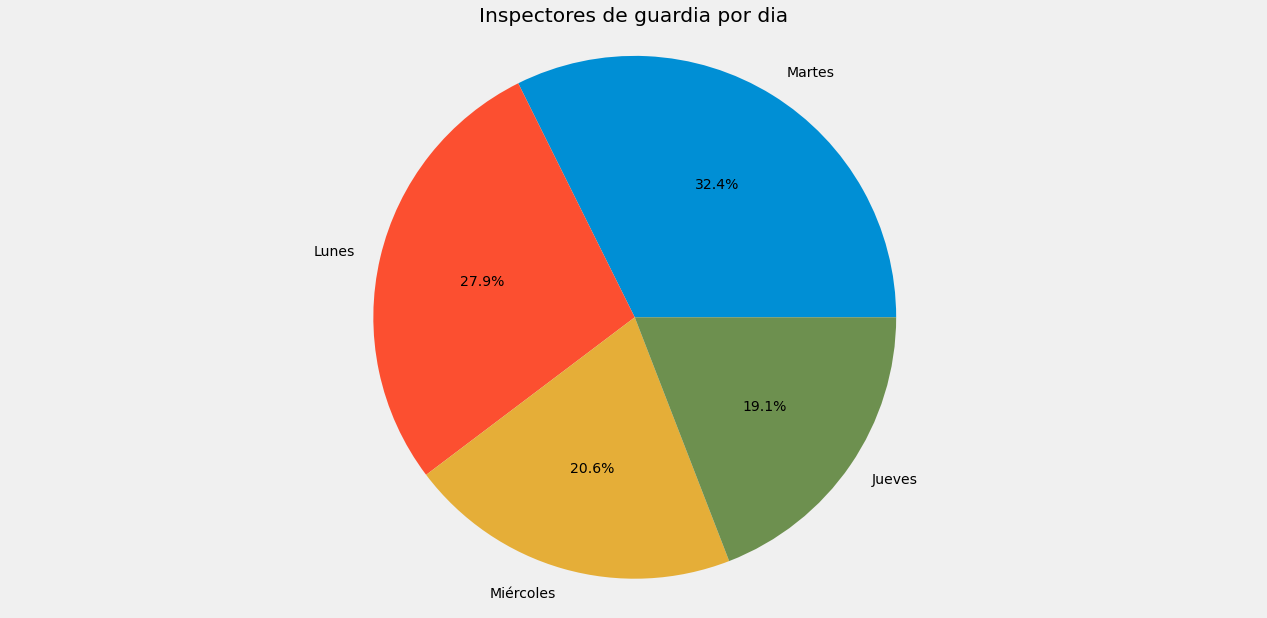

In [10]:
plt.figure(figsize=(20,10))
plt.title('Inspectores de guardia por dia')
plt.pie(guardias_inspectores.total, labels=guardias_inspectores.dia, autopct='%1.1f%%')

plt.axis('equal')
plt.show()

In [11]:
guardias = df.groupby('DiaGuardia')\
    .Territorio.count()\
    .to_frame()\
    .reset_index()\
    .rename(columns={'DiaGuardia': 'dia', 'Territorio': 'total'})\
    .sort_values('total', ascending=False)

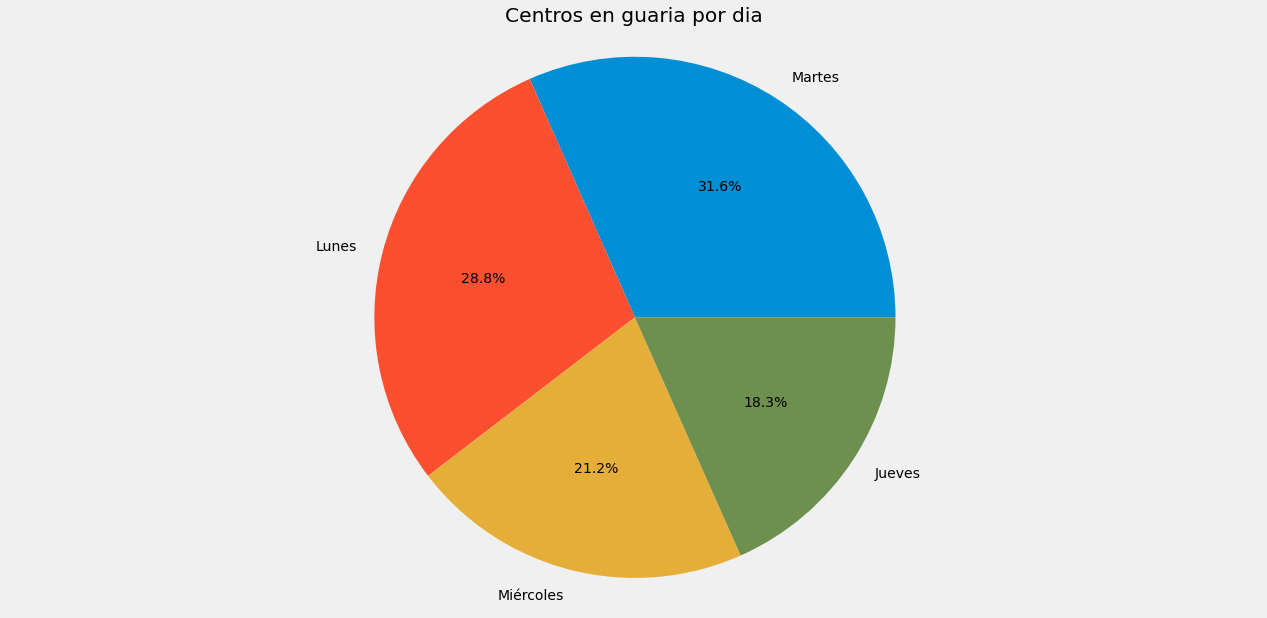

In [12]:
plt.figure(figsize=(20,10))
plt.title('Centros en guaria por dia')
plt.pie(guardias.total, labels=guardias.dia, autopct='%1.1f%%')

plt.axis('equal')
plt.show()

## Centros por terrritorio

In [13]:
centros_por_territorio = df.groupby('Territorio')\
    .CodigoCentro.count()\
    .to_frame()\
    .rename(columns={'DiaGuardia': 'dia', 'CodigoCentro': 'total'})\
    .sort_values('total', ascending=False)

centros_por_territorio

,total
Territorio,
LP0 - Provincia Las Palmas,709
TF0 - Provincia Santa Cruz de Tenerife,708


## Zonas por territorio

In [14]:
zonas_por_territorio = zona_de_inspeccion.groupby('Territorio')\
    .CodigoZonaInspeccion.count()\
    .to_frame()\
    .rename(columns={'CodigoZonaInspeccion': 'total'})\
    .sort_values('total', ascending=False)
zonas_por_territorio

,total
Territorio,
LP0 - Provincia Las Palmas,36
TF0 - Provincia Santa Cruz de Tenerife,32


## Centros asociados por inspector

In [15]:
inspecciones_por_inspector = df.groupby('ApellidosNombre')\
    .Territorio.count()\
    .to_frame()\
    .rename(columns={'Territorio': 'total'})\
    .sort_values('total', ascending=False)\
    .reset_index()

inspecciones_por_inspector['ApellidosNombre'] = inspecciones_por_inspector['ApellidosNombre'].str.lower()

inspecciones_por_inspector.head()

,ApellidosNombre,total
0,"leal simón, jose francisco",32
1,"brito díaz, maría teresa",32
2,"pérez borges, juan ramón",31
3,"ballesteros ballester, alfonso",30
4,"gonzález gonzález, juan fabián",28


## Centros por inspector

In [16]:
centros_por_zona = centros_de_inspeccion.groupby('CodigoZonaInspeccion')\
    .CodigoCentro.count()\
    .to_frame()\
    .rename(columns={'CodigoCentro': 'total'})\
    .sort_values('total', ascending=False)\
    .reset_index()

centros_por_zona

,CodigoZonaInspeccion,total
0,601,32
1,603,32
2,201,31
3,602,30
4,702,28
...,...,...
63,323,14
64,320,14
65,326,14
66,300,9


Estos dos últimos cálculos son el mismo por los motivos que ya he nombrado anteriormente.

### Top 10

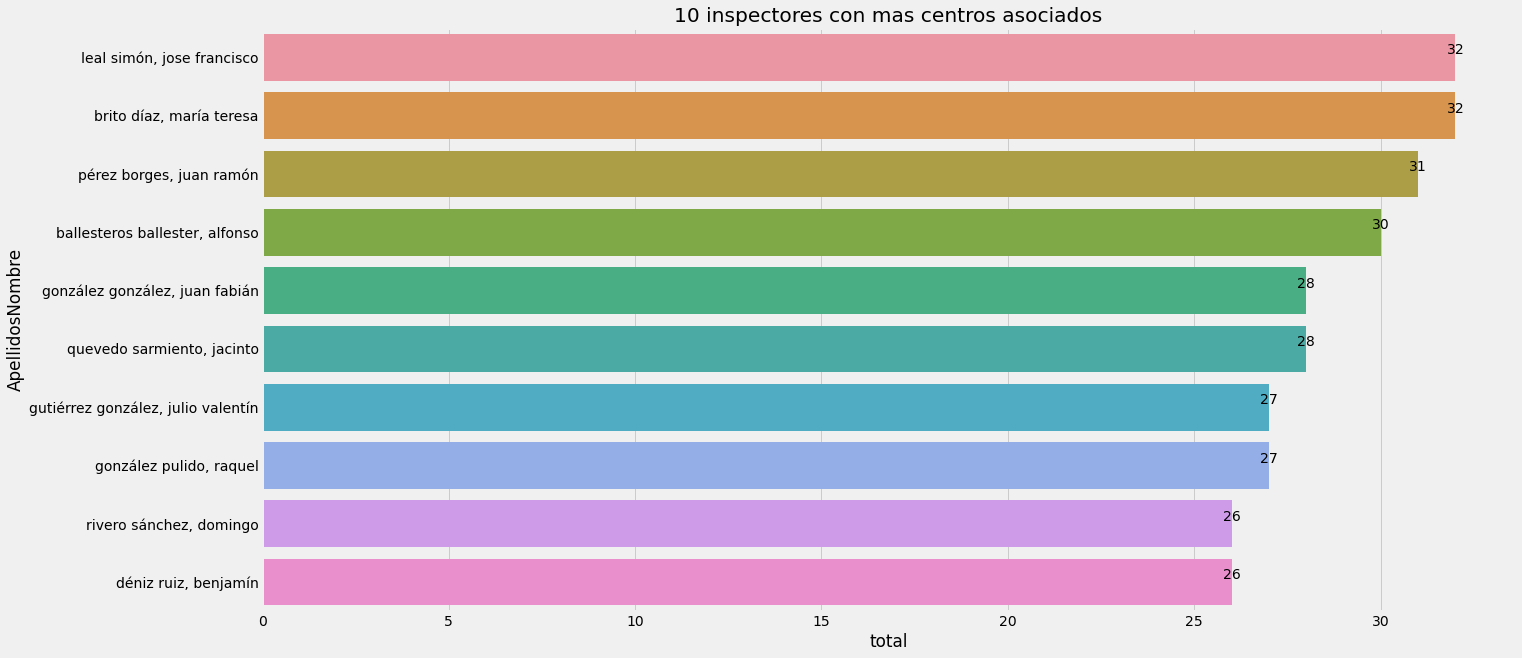

In [17]:
primeros_10 = inspecciones_por_inspector.head(10)

plt.figure(figsize=(20,10))
plt.title('10 inspectores con mas centros asociados')
g = sns.barplot(data=primeros_10, x='total', y='ApellidosNombre')

for p in g.patches:
    g.text(p.get_width(), p.get_height()/2. + p.get_y(), '%d' % int(p.get_width()), ha='center', va='bottom')

### Botton 10

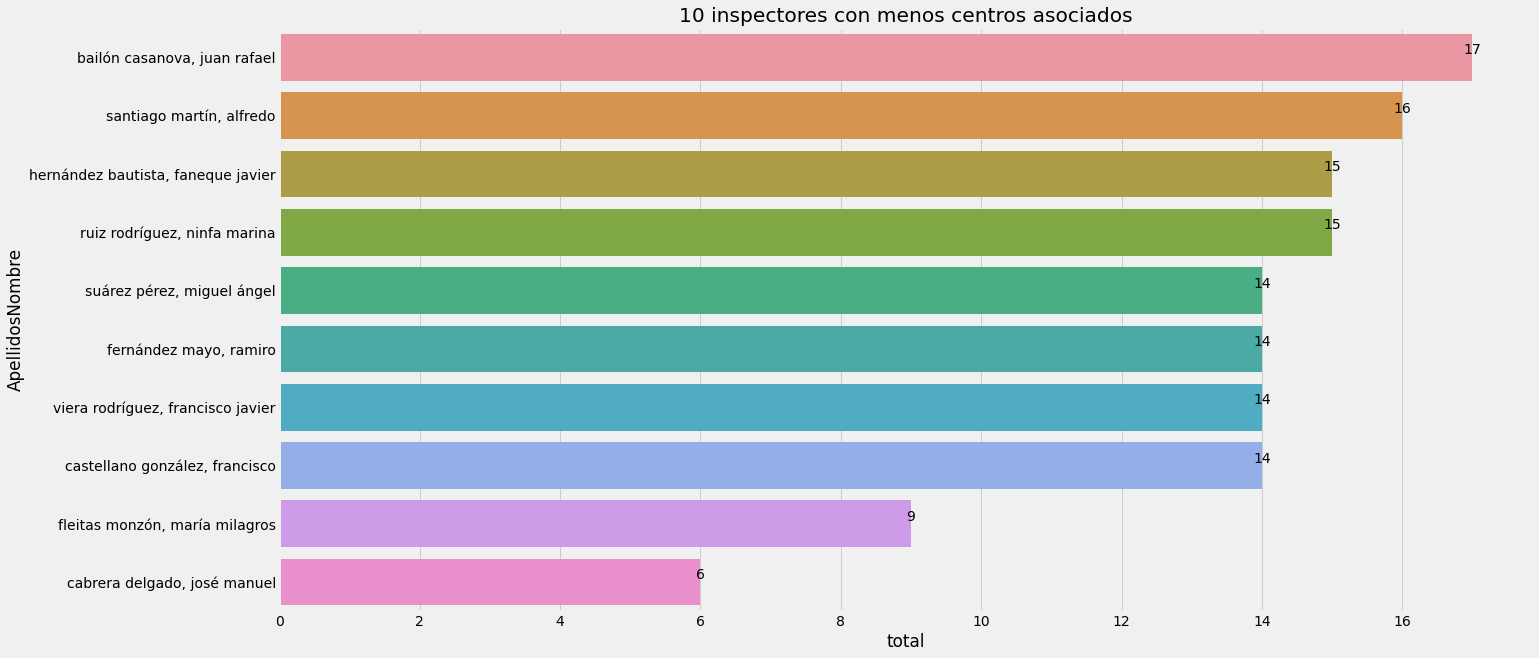

In [18]:
ultimos_10 = inspecciones_por_inspector.tail(10)

plt.figure(figsize=(20,10))
plt.title('10 inspectores con menos centros asociados')
g = sns.barplot(data=ultimos_10, x='total', y='ApellidosNombre')

for p in g.patches:
    g.text(p.get_width(), p.get_height()/2. + p.get_y(), '%d' % int(p.get_width()), ha='center', va='bottom')

## Conclusiones

Gracias a estos conjuntos de datos hemos aprendido que tenemos que ser más críticos con los datos. Es decir, no tenemos que creernos, imaginar o suponer nada de los datos. Estamos aquí para analizarlos lo más objetivamente posible, no nos tenemos que fiar de los nombres de los campos al 100%